<div style="background:#d4d6fa; color:#000; padding:10px">
    <p><big><b> Комментарий тимлида: </b></big></p> 

Привет! Я буду использовать стандартную цветовую разметку комментариев:
    
<div class="alert alert-success">
        <strong>Зелёным</strong> цветом я буду выделять удачные и элегантные решения, на которые можно опираться в будущих проектах. 
    </div> 
    <div class="alert alert-warning">
        <strong>Желтым</strong> будет выделено то, что в следующий раз стоит сделать по-другому. Одно-два таких замечаний в проекте допустимы, но если их будет больше, то нужно будет внести изменения.
    </div>
    <div class="alert alert-danger">
        <strong>Красным</strong> - то, что необходимо исправить, прежде чем я смогу принять твой проект.
    </div> 

    
Лично я тоже предпочитаю сначала согласовать проект, а уже потом оформлять презентацию. 
    
    
</div>

<div style="background:#d4d6fa;color:#000; padding:10px; margin-top:10px">
    <p><big><b> Итоговый Комментарий тимлида:</b></big></p>
    
**Проект** - **почти зачтено**
    
Довольно хороший проект. Само исследование - ок. Я немного не согласен с тем, что окупать нам нужно только «прошедших». Как минимум по тому, что «непрошедших» более половины, и мы не можем пренебрегать этими данными. подробнее написал в блоке с исследованием.
    
И нужно будет немного доработать формулировки стат. гипотез. Я считаю, что очень важно различать такие два понятия, как «рабочая» и «статистическая» гипотеза, и корректно формулировать каждую. Так, рабочая может звучать в весьма свободном формате, а вот статистическая должна быть согласована с используемым стат. тестом.
    
   
Уверен, правки, о которых я писал, сильно не изменят результаты, так что можешь смело готовить презентацию. Кстати про результаты - там хочу похвалить. Ты ответил на основной вопрос заказчика и притом с хорошей аргументацией.     
    


</div>


<div class="alert alert-warning">
    <p><b>Комментарий тимлида: </b></p>
    
Любой проект достоин иметь введение. Там ты можешь дать читателю весь начальный контекст задачи, который необходим для её лучшего понимания.
</div>


# Выпускной проект: Анализ рекламных источников мобильной игры «Космические братья»

Давайте примерим на себя роль гуру аналитики и поможем заказчикам (ответственным за принятие решение в игре людям) проранжировать рекламные источники по имеющимся данным. 

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом;

- Реализация проекта - разработка орбитальной сборки спутников.

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- **event_datetime** — время события;


- **event** — одно из трёх событий:
    
    1) building — объект построен,
    
    2) finished_stage_1 — первый уровень завершён,
    
    3) project — проект завершён;
    
    
- **building_type** — один из трёх типов здания:


    1) assembly_shop — сборочный цех,
    
    2) spaceport — космопорт,
    
    3) research_center — исследовательский центр;
    
    
- **user_id** — идентификатор пользователя;


- **project_type** — тип реализованного проекта;


Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_cost.csv*:


- **day** - день, в который был совершен клик по объявлению,

- **source** - источник трафика,

- **cost** - стоимость кликов;


Датасет user_source.csv содержит колонки:

- **user_id** - идентификатор пользователя,

- **source** - источников, с которого пришёл пользователь, установивший приложение;

# Содержание 

- [Открытие файлов с данными, изучение информации, подготовка данных](#step1)


- [Изучение и проверка данных](#step2)


- [Ранжирование источников привлечения](#step3)


- [Проверка гипотез](#step4)


- [Общий вывод по проекту](#step5)

<a id="step1"></a>
# Открытие файлов с данными, изучение информации, подготовка данных

In [1]:
# Вводим необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Отключим сообщения об ошибках
import warnings
warnings.filterwarnings('ignore')
# Удалим ограничение количества отображаемых в таблице столбцов
pd.set_option('display.max_columns', None)

In [3]:
# Указываем путь до файла (индивидуально у каждого пользователя)
path_to_events = 'game_actions111.csv' 
try:
    events = pd.read_csv(path_to_events)
except:
    print('Wrong filepath')

In [4]:
# Выводим первые 5 строчек
events.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [5]:
# Изучим состав нашего df
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


В нашем df 135640 строчек, пропуски есть в столбцах: building_type и project_type (чуть позже рассмотрим их природу).

Cменим тип данных колонки event_datetime на datetime[ns]

In [6]:
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [7]:
# Взглянем на пропуски в столбце builing_type
events[events['building_type'].isna()]

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [8]:
events[events['building_type'].isna()]['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

Пропуски в столбце building_type появляются только в случае завершения первого уровня или постройки проекта. Обрабатывать их не нужно

In [9]:
# Посмотрим на строки с заполненным project_type
events[events['project_type'].notnull()]

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135602,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


<div class="alert alert-success">
    <p><b>Комментарий тимлида: </b></p>
    
Верно, важно было сказать, что пропуски обусловлены механикой сбора данных и не являются ошибками.
</div> 

Во всех случаях, кроме события project столбец project_type будет пустым. Обрабатывать эти проспуски не нужно.

Изучим df на наличие дубликатов.

In [10]:
events.duplicated().sum()

1

In [11]:
# Посмотрим на этот дубликат
events[events.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


<div class="alert alert-success">
    <p><b>Комментарий тимлида: </b></p>
    
Согласен, дубликат нам не нужен
</div> 

In [12]:
# И смело удалим
events.drop_duplicates()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


В условиях сказано, что данные содержат информацию о пользователях, которые начали пользоваться нашим приложением с 4 по 10 мая включительно, проверим это утверждение.

In [13]:
events['event_dt'] = events['event_datetime'].dt.date
events.groupby('user_id')['event_dt'].first().value_counts()

2020-05-04    5860
2020-05-05    3361
2020-05-06    1847
2020-05-07    1109
2020-05-08     688
2020-05-09     440
2020-05-10     271
Name: event_dt, dtype: int64

Данные предобработаны и готовы к дальшейней работе.

Переходим к следующему df - с информацией и дате покупки рекламы и её стоимости

In [14]:
path_to_ad = 'ad_costs333.csv' # Указываем путь до файла (индивидуально у каждого пользователя)
try:
    adv = pd.read_csv(path_to_ad)
    adv.name = 'adv'
except:
    print('Wrong filepath')

In [15]:
adv.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [16]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Изменим тип данных колонки day на date

In [17]:
adv['day'] = pd.to_datetime(adv['day'])
adv.info()
adv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [18]:
# Проверим на наличие дубликатов
adv.duplicated().sum()

0

Данных было немного, они чистые в предобработке не нуждаются.

Переходим к следующему df

In [19]:
path_to_source = 'user_source222.csv' # Указываем путь до файла (индивидуально у каждого пользователя)
try:
    source = pd.read_csv(path_to_source)
    source.name = 'source'
except:
    print('Wrong filepath')

In [20]:
source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [21]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [22]:
source.duplicated().sum()

0

Данные чистые, пропуски не обнаружены.

Проверим на наличие дубликатов

## Вывод

**В данном разделе мы загрузили, открыли, изучили исходные датафреймы, изменили типы данных, избавились от дубликатов и подготовили данные для дальнейшего анализа.**

<a id="step2"></a>
# Изучение и проверка данных

С помощью метода merge для каждого пользователя в таблице events добавим инфорацию об источнике его перехода.

In [23]:
events = events.merge(source, on='user_id', how='left')
events.head()

,event_datetime,event,building_type,user_id,project_type,event_dt,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,yandex_direct


Ответим на следующие вопросы:

**1) Какое общее количество логов?**

**2) Сколько у нас уникальных пользователей?**

**3) Сколько игроков перешли на 2ой уровень?**

**4) Какое количество сделало это с помощью строительства орбитальной станции?**

**5) Сколько пользователей перешли путём победы над соперником?**

**6) Какое среднее число событий приходится на 1 пользователя?**

*P.S.* Мы не можем посчитать сколько пользователей перестали пользоваться нашим приложением, т.к. считаем что если нет события finished_stage_1 как и building, то пользователь может просто усиленно воевать. 

Но монетизация нашего момента начинается со второго уровня, поэтому анализировать логично пользователей, перешедших на второй уровен, а не залипнувших на первом. Поэтому дальшейший анализ мы будем производить на пользователях, перешедших на 2ой уровень.

In [24]:
# Давайте получим user_id пользователей, перешедших на 2ой уровень и отфильтруем наш Df
good_users = events.query('event=="finished_stage_1"')['user_id'].unique()

good_events = events[events['user_id'].isin(good_users)]
good_events.name = 'good_events'
good_events.head()

,event_datetime,event,building_type,user_id,project_type,event_dt,source
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,instagram_new_adverts
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,yandex_direct
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,2020-05-04,facebook_ads
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN,2020-05-04,yandex_direct


In [25]:
# Проверим себя, сравнив количество пользователей в списке good_users и количество уникальных пользователей df good_events
print('Мы правильно отфильтровали данные:', len(good_users) == good_events['user_id'].nunique())

Мы правильно отфильтровали данные: True


Теперь, имея на руках необходимые данные можем отвечать на вопросы

In [26]:
# Какое общее количество логов?
print('Общее количество логов в таблице {} - {}'.format('good_events', events.shape[0]))

Общее количество логов в таблице good_events - 135640


In [27]:
# Сколько у нас уникальных пользователей?
print('Изначальное количество уникальных пользователей - {}'.format(events['user_id'].nunique()))

Изначальное количество уникальных пользователей - 13576


In [28]:
# Сколько игроков перешли на 2ой уровень?
print('Количество игроков, перешедних на второй уровень - {}'.format(len(good_users)))

Количество игроков, перешедних на второй уровень - 5817


In [29]:
# Какое количество сделало это с помощью строительства орбитальной станции?
print(
    'Количество игроков, перешедних на второй уровень с помощью строительства орбитальной станции - {}'
    .format(good_events[good_events['event']=='project']['user_id'].count())
)

Количество игроков, перешедних на второй уровень с помощью строительства орбитальной станции - 1866


In [30]:
# Сколько пользователей перешли путём победы над соперником?
print(
    'Количество игроков, перешедних на второй уровень перешли путём победы над соперником - {}'
    .format(len(good_users) - good_events[good_events['event']=='project']['user_id'].count())
)

Количество игроков, перешедних на второй уровень перешли путём победы над соперником - 3951


In [31]:
# Какое среднее число событий приходится на 1 пользователя?
print(
    'Среднее число событий на 1 пользователя в исходном df events - {}'
    .format(round(events.groupby('user_id').agg({'event':'count'})['event'].mean(),3))
)
print(
    'Среднее число событий на 1 пользователя в отфильтрованном df good_events - {}'
    .format(round(good_events.groupby('user_id').agg({'event':'count'})['event'].mean(),3))
)

Среднее число событий на 1 пользователя в исходном df events - 9.991
Среднее число событий на 1 пользователя в отфильтрованном df good_events - 11.771


Text(0.5, 0, 'Вид события')

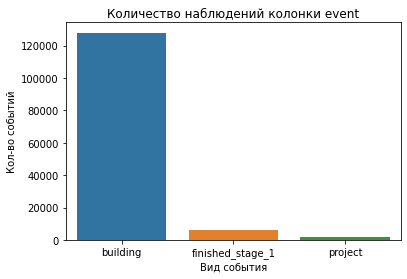

In [32]:
# Посмотрим на количество наблюдений среди event
sns.countplot(data=events, x='event')
plt.title('Количество наблюдений колонки event')
plt.ylabel('Кол-во событий')
plt.xlabel('Вид события')

Text(0.5, 0, 'Дата')

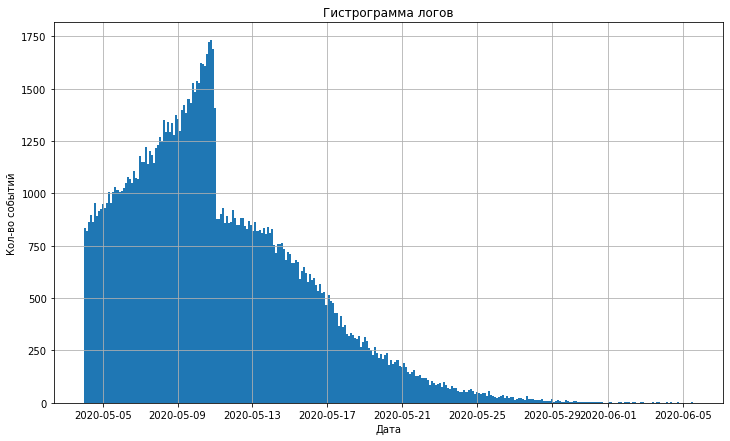

In [33]:
# Давайте посмотрим на распределение логов во времени
plt.figure(figsize=(12,7))
events['event_datetime'].hist(bins=300)
plt.title('Гистрограмма логов')
plt.ylabel('Кол-во событий')
plt.xlabel('Дата')

По имеющейся иллюстрации наблюдается явный пик активности игроков 10 мая, после чего наблюдается резкий спад.  Чтобы точнее оценить ситуацию необходимо посмотреть на еще несколько вещей.

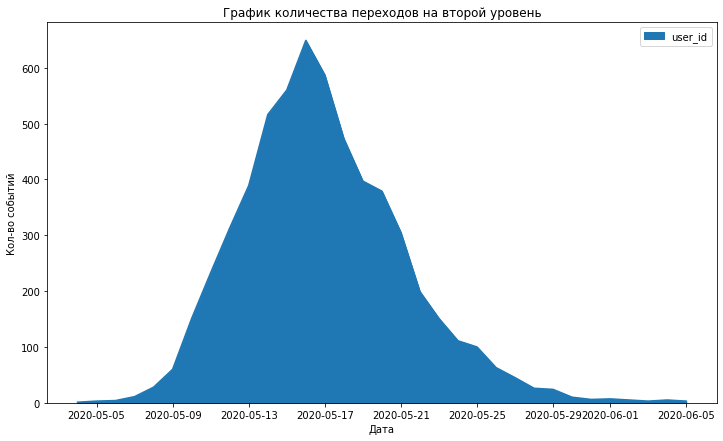

In [34]:
# Давайте построим визуализацию количества активностей finished_stage_1
fig = plt.figure(figsize=(12,7))
ax  = fig.add_subplot(1,1,1)
events.query('event=="finished_stage_1"')\
    .groupby('event_dt')['user_id']\
    .count().reset_index()\
    .plot(kind='area', x='event_dt', y='user_id', ax=ax)
plt.title('График количества переходов на второй уровень')
plt.ylabel('Кол-во событий')
plt.xlabel('Дата')
plt.show()

In [35]:
# И предлагаю оценить график количества новых пользователей
events.groupby('user_id').agg({'event_dt':'first'})['event_dt'].value_counts()

2020-05-04    5860
2020-05-05    3361
2020-05-06    1847
2020-05-07    1109
2020-05-08     688
2020-05-09     440
2020-05-10     271
Name: event_dt, dtype: int64

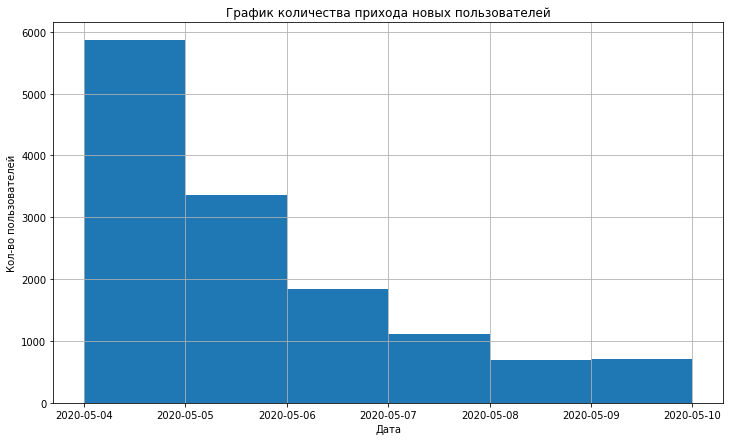

In [36]:
# Визуализирум
fig = plt.figure(figsize=(12,7))
ax  = fig.add_subplot(1,1,1)
events.groupby('user_id').agg({'event_dt':'first'}).reset_index()['event_dt'].hist(bins=6)
plt.title('График количества прихода новых пользователей')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Дата')
plt.show()

Графики показывают нам, что большая часть новый пользователей была привлечена именно 4ого мая, а пик количетсва активностей 10-11 мая связан с наложением активностей всех когорт. Резкое уменьшение логов может быть связано с 4мя вещами:

- Потерей запала в глазах (некотороые пользователи первые дни играют взахлёб, а потом интенсивность сильно проседает),

- Прогрессивная модель строительства зданий (чем больше построек, или чем они круче, тем больше времени необходимо на её строительтсво),

- 11 числа вышел патч/ивент поднявший ценность пвп сражений,

- Окончание набора в тестовую когорту, также смена механизм отбора пользователей (сперва были опытные игроки, а потом начали приходить игроки казуалы).




<div style="background:#d4d6fa; color:#000; padding:10px; margin-top:10px">
    <p><b> Комментарий тимлида: </b></p>
    
С четырьмя - окончание набора в тестовую когорту. А также с тем, как именно отбирали пользователей.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Окей, добавил)
 </div>

Проверим первое (самое логичное) утверждение

In [37]:
events

,event_datetime,event,building_type,user_id,project_type,event_dt,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,yandex_direct
...,...,...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,instagram_new_adverts
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,yandex_direct
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-05,youtube_channel_reklama
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,facebook_ads


In [38]:
# Делаем df с первой датой первого захода в приложение
lifetime = events.groupby('user_id').agg({'event_dt':'first'}).reset_index().rename(columns={'event_dt':'first_ts'})
lifetime

# Добавляем к нашему основному df
events = events.merge(lifetime, on='user_id', how='left')

# Вычисляем лайфтайм ивента и меняем тип столбца на инт для удобства
events['lifetime'] = events['event_datetime'].dt.date - events['first_ts']
events['lifetime'] = events['lifetime'].apply(lambda x: x/pd.Timedelta(days=1))
events['lifetime'] = events['lifetime'].astype('int64')

Text(0.5, 1.0, 'День лайфтайма')

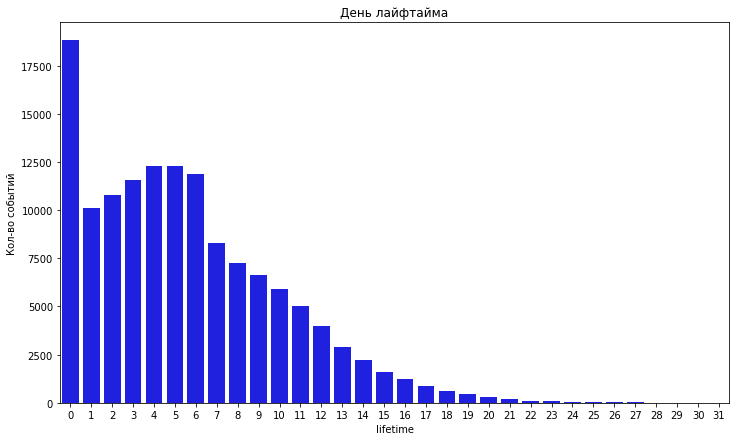

In [39]:
# А теперь построим график

plt.figure(figsize=(12,7))
sns.countplot(data=events, x='lifetime', color='blue')
plt.title('График количества активностей в зависимости от дня lifetime')
plt.ylabel('Кол-во событий')
plt.title('День лайфтайма')

На графике видно, что пользователи проявляют самую высокую активность в день установки приложения, на следующий день она падает вдвое и постепенно расчёт до 6ого дня лайфтайма. По истечению недели количество активностей неуклонно снижается. Важно помнить, что график отображает активности пользователей на 1ом уровне.

Теперь мы можем смело сказать, что пик 10-11 мая и дальнейший упадок связаны с уменьшием активности самой большой группы, впервые зашедших в приложение 4ого мая.



## Вывод

**В данном разделе мы изучили данные и узнали следующее:**

1) Общее количество логов  - 135640,

2) Уникальное количество пользователей - 13576,

3) Количество пользователей, перешедший на 2ой уровень - 5817 (по pve сценарию - 1866, по pvp - 3951),

4) Среднее количество ивентов на пользотвателя среди всех - 9.99, среди перешедних на 2ой уровень - 11.77.

**Построено и изучено распределение логов во времени, наибольший пик наблюдается 10-11 мая, объясняется тем, пользователи очень активно играют первую неделю, после чего количество активностей идёт на спад. 10-11 мая в активной фазе были все наши пользователи (приходили с 4 по 10 мая), а начиная с 12 мая самая большая по численности группа (пришедшие 4ого мая) стала меньше играть, что привело к резкому снижению кол-ва активностей (ну и логов соответственно).**

<a id="step3"></a>
# Ранжирование источников привлечения

Для того чтобы проранжировать источники нам необходимо поделить пользователей на группы

In [40]:
# Напишем функцию получения профилей
def get_profiles(good_events):
    profiles = (
        events.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg({
            'event_datetime':['first', 'last'],
            'source':'first',
            'event':'count',
            'event_dt':'first'
        })
        .reset_index()
    )
    profiles.columns = ['user_id', 'first_ts', 'last_ts', 'source', 'activities','first_dt']
    profiles['playtime'] = (profiles['last_ts']- profiles['first_ts'])
    profiles = profiles[['user_id', 'first_ts', 'source', 'activities', 'first_dt', 'playtime']]
    return profiles

In [41]:
# Получим профили пользователей
prof = get_profiles(events)
# переводим playtime в часы
prof['playtime'] = prof['playtime'].apply(lambda x: round(x/pd.Timedelta('1 hour'),2))
prof

,user_id,first_ts,source,activities,first_dt,playtime
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,facebook_ads,13,2020-05-06,346.31
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,yandex_direct,9,2020-05-06,295.63
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,youtube_channel_reklama,4,2020-05-05,207.21
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,instagram_new_adverts,9,2020-05-05,154.65
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,facebook_ads,12,2020-05-05,396.95
...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,instagram_new_adverts,10,2020-05-04,188.28
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,facebook_ads,16,2020-05-04,238.22
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,yandex_direct,10,2020-05-04,202.95
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,instagram_new_adverts,7,2020-05-04,169.60


In [42]:
# Cделаем когортную таблицу для предварительного сравнения рекламных источников.
cohort_table = (
    prof.groupby(['first_dt','source'])
    .agg({'user_id':'nunique',
          'activities':['mean', 'median'],
          'playtime':['mean', 'median']
        })
).reset_index()
cohort_table.columns=['dt','source','num_of_users','act_mean', 'act_med','playtime_mean','playtime_med']

# Для удобства переведём среднее и медианное время проведенное в игре в часы
cohort_table['dt'] = pd.to_datetime(cohort_table['dt'])
cohort_table.head()

,dt,source,num_of_users,act_mean,act_med,playtime_mean,playtime_med
0,2020-05-04,facebook_ads,1184,11.167230,12.0,275.182424,270.600
1,2020-05-04,instagram_new_adverts,1452,11.062672,11.5,270.846136,264.275
2,2020-05-04,yandex_direct,2078,10.796920,11.0,270.490717,262.870
3,2020-05-04,youtube_channel_reklama,1146,10.911867,11.0,270.276038,265.380
4,2020-05-05,facebook_ads,694,10.534582,11.0,252.757104,247.865


In [43]:
# Объединим таблицы adv и cohort_table, чтобы определить Customer Acquisition Cost
adv = adv.rename(columns={'day':'dt'})
adv = adv.merge(cohort_table[['dt','source','num_of_users']], on=['source','dt'], how='left').dropna()
adv['cac'] = adv['cost']/adv['num_of_users']
adv.head()

,source,dt,cost,num_of_users,cac
1,facebook_ads,2020-05-04,548.354480,1184.0,0.463137
2,facebook_ads,2020-05-05,260.185754,694.0,0.374907
3,facebook_ads,2020-05-06,177.982200,345.0,0.515890
4,facebook_ads,2020-05-07,111.766796,224.0,0.498959
5,facebook_ads,2020-05-08,68.009276,139.0,0.489275


In [44]:
# Добавим cac в таблицу cohort_table
cohort_table = cohort_table.merge(adv[['dt','source','cac']], on=['source','dt'], how='left')
cohort_table.head()

,dt,source,num_of_users,act_mean,act_med,playtime_mean,playtime_med,cac
0,2020-05-04,facebook_ads,1184,11.167230,12.0,275.182424,270.600,0.463137
1,2020-05-04,instagram_new_adverts,1452,11.062672,11.5,270.846136,264.275,0.346367
2,2020-05-04,yandex_direct,2078,10.796920,11.0,270.490717,262.870,0.266916
3,2020-05-04,youtube_channel_reklama,1146,10.911867,11.0,270.276038,265.380,0.226067
4,2020-05-05,facebook_ads,694,10.534582,11.0,252.757104,247.865,0.374907


<div class="alert alert-info"> <b>Комментарий студента:</b> 
Вот тут я не знаю, поступил правильно или нет, стоимость привлечения мы посчитали тоже только для тех, кто перешёл на второй уровень(а можно посчитать и для тех, кто до сих пор воююет и не перешёл), ну надеюбсь ты подскажешь как поступить, пока буду считать таким образом.
    
Во всяком случае я руководствовался так, начинаем монетизировать со второго уровня, поэтому важнее рассмотреть тех, кто уже туда перешёл, а не тех кто занимается чисто ПВП или быть может вообще отвалился (проверить никак не можем).
 </div>

<div class="alert alert-danger">
    <p><b>Комментарий тимлида: </b></p>
    
помечу красным, так как новая информацию повлечёт небольшие изменения в работе.
    
---

Да, безусловно наиболее интересны те пользователи, что прошли на след уровень. И наша задача как можно меньше отпугнуть подобных пользователей. Однако не стоит заставлять их окупать и «себя и того парня». Ведь остальные пользователи тоже играют в игру, тоже смотрят рекламу, следовательно, тоже приносят деньги. Даже больше, некоторые из них могут и себя окупить, и ещё кого-нибудь. Хотя да, большинство окупились лишь частично. Но на непрошедших приходится почти половина всех событий, следовательно, они приносят значимую часть от общего дохода.
    
Нам следует окупить всех пользователей за счёт всех событий, и при этом как можно меньше отпугнуть «вовлечённых» новой рекламой.
    
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> 
Окей, сделал для всех. Хотя мы вроде договаривались, что у нас монетизация со второго уровня(поэтому не брал в расчёт тех, кто за месяц игры на второй уровень не перешёл)... Ну да ладно, может не так понял)
 </div>

In [45]:
# Посмотрим игроки из какого источника всреднем строят больше зданий. какие тратят больше времени на прохождение, оценим cac
avg_pt = prof.groupby('source')['playtime'].mean().sort_values(ascending=False).apply(lambda x: round(x,3))
avg_act = prof.groupby('source')['activities'].mean().sort_values(ascending=False).apply(lambda x: round(x,3))
avg_cac = cohort_table.groupby('source')['cac'].mean().sort_values(ascending=False).apply(lambda x: round(x,3))

display(avg_pt)
display(avg_act)
display(avg_cac)

source
instagram_new_adverts      258.923
facebook_ads               257.555
yandex_direct              254.774
youtube_channel_reklama    254.084
Name: playtime, dtype: float64

source
facebook_ads               10.151
instagram_new_adverts      10.086
yandex_direct               9.901
youtube_channel_reklama     9.872
Name: activities, dtype: float64

source
facebook_ads               0.467
instagram_new_adverts      0.390
yandex_direct              0.274
youtube_channel_reklama    0.246
Name: cac, dtype: float64

Отличия в среднем времени, затраченном на прохождение первого уровня небольшие, но всё же есть - быстрее всего это делают пользователи из Ютюба и Яндекс Директа (различия порядка 41 минуты в пользу первого) далее с отставанием в 3 часа идёт Фейсбук, ну а больше всего времени на прохождение первого уровня уходит у пользователей из Инстаграмма.

По среднему количествую построек все источники показывают примерно один и тот же результат, разница между первым и последним местом менее 3%.

Самые дешевые пользователи приходят из Youtube - 0.246 y.e., чуть дороже всреднем обходится пользователь из Яндекс Директа 0.274 y.e., на на 58% дороже Ютюда обойдутся пользователи Instagram (0.39 у.е.), ну а "золотыми" (в плохом смысле этого слова) будут пользователи Facebook с пок-ем 0.467 у.е.

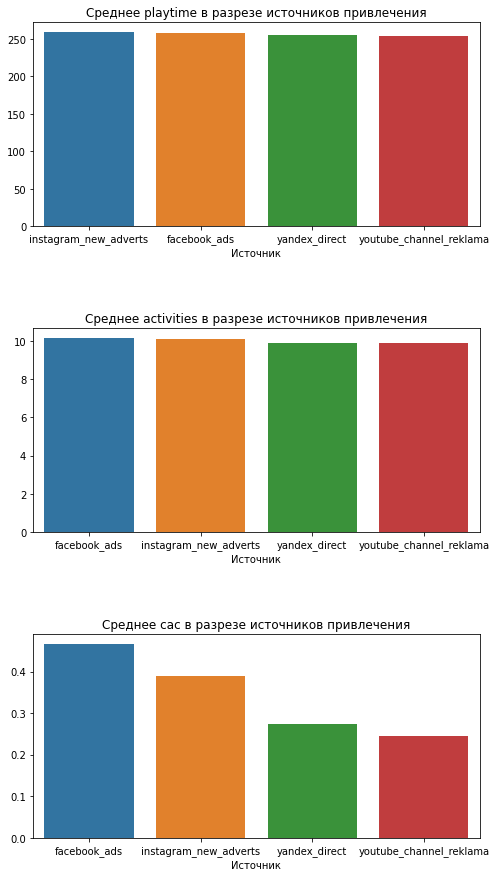

In [46]:
table_list = [avg_pt, avg_act, avg_cac]
plt.figure(figsize=(8,15))
for i,j in enumerate(table_list):
    plt.subplot(3,1,i+1)
    sns.barplot(x=j.index, y=j.to_list())
    plt.title('Среднее {} в разрезе источников привлечения'.format(table_list[i].name))
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel('Источник')

Как мы можем заметить из графиков существенная разница между источниками заключается только в стоимости привлечения.

Наше приложение зарабатывает деньги через показы рекламы во время выбора объекта для строительства, из набора доступных нам данных, самым оптимальным будет среднее количество построенных зданий (как я уже сказал - это наши деньги, чем больше, тем лучше), деленное на стоимость привлечения пользователя и время, потраченное на прохождение уровня (более быстрое прохождение показывает большую заинтересованность игрока, что означает снижение вероятности бросить игру). Для удобства домножим вычисленный параметр на 1000.

Объединим таблицы avg_pt, avg_act, avg_cac в одну и добавим столбец, вычисляемый по формуле выше.

In [47]:
rang_source = pd.concat([avg_pt, avg_act, avg_cac], axis=1)
rang_source['value'] = round((rang_source['activities'] / rang_source['playtime'] / rang_source['cac'] * 1000),4)
rang_source.sort_values(by='value', ascending=False)

,playtime,activities,cac,value
source,,,,
youtube_channel_reklama,254.084,9.872,0.246,157.9402
yandex_direct,254.774,9.901,0.274,141.8317
instagram_new_adverts,258.923,10.086,0.390,99.8812
facebook_ads,257.555,10.151,0.467,84.3960


Т.о., используя наш параметр, мы проранжировали источники привлечения пользователей:

Самым выгодным оказалась реклама на Youtube с условным показателем эффективности в практически 158 единиц,

На 16 пунктов эффективности ниже реклама Яндекс Директа (на 10.2% менее эффективна чем лидер),

С отставанием на 56 пунктов эффективности от лидера, на третьем месте располагается реклама из Instagram(на 36.7% менее эффективна),

Ну а на последнем месте, с показателем, практически вдвое меньше чем у лидера находится реклама в Facebook (эффективность на 46,6% ниже чем у лидера).

Подводя краткий итог, можно сказать, поведение пользователей из различных источников практически идентично, более значимую роль играет стоимость их привлечения.

## Вывод

**В этом разделе мы создали профили пользователей, поделили их на когорты, в зависимости от рекламной компании в которой они пришли, для каждой когорты рассчитали среднее и медианное количество активностей и затраченных на прохождение уровня часов, вычислили САС для каждого из каналов, после чего ввели условный параметр эффективности, приняв, что самые эффективные пользователи это те - у кого показатель выше показатель количество активностей в ед.времени / на стоимость.**

**Наибольший вес играла стоимость привлечения, поэтому самым эффективным источником стал Youtube, пользователи оттуда стоят недорого, а остальные параметры +- равны для всех источников привлечения. На втором месте по эффективности Яндекс-директ (с небольшим оставанием от лидера). Третье и четвертое место занимают Инстаграм и Фейсбук соответственно, пользователи оттуда много дороже пользователей из Youtube и Яндекс-директа, поэтому и эффективность ниже.**

<a id="step4"></a>
# Проверка гипотез

В данном разделе мы проверим две гипотезы:

1) Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта/через победу над первым игроком.

2) Количество построенных зданий различается в зависимости от способа прохождения.

**Начнём с гипотезы про время завершения проекта, сформируем нулевую и альтернативную гипотезы:**

- H0 - Среднее время прохождение уровня не различается в зависимости способа прохождения.

- Н1 - Среднее время прохождение уровня различается в зависимости способа прохождения.

<div class="alert alert-warning">
    <p><b>Комментарий тимлида: </b></p>
    
**Среднее** временя прохождения...
    
Так как ниже ты используешь t-тест, а он проверяет гипотезу о равенстве средних значений (оценок мат. ожидания). Стат. гипотезы должны быть согласованы с используемым критерием. Так, например, при использовании z-теста, гипотезы были бы уже о долях и т.д.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Понял о чём ты говоришь, запомнил и подправил
 </div>

In [48]:
# Id пользователями выполнившими проект
pve_users = good_events[good_events['event']=='project']['user_id'].unique()

# Sample с длительностью для pve
pve_df = prof[prof['user_id'].isin(pve_users)].reset_index()['playtime'].to_list()

# Sample с длительностью для pvp
pvp_df = prof[~prof['user_id'].isin(pve_users)].reset_index()['playtime'].to_list()

In [49]:
# Значение альфа установим на стандартном 5%
alpha = 0.05

# Проводим тест на сравнение средних в двух ген.совокупностях
result_hyp1 = st.ttest_ind(pve_df, pvp_df, equal_var=False)
print('p-значение: ', result_hyp1.pvalue)
if result_hyp1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-значение:  9.7498378624608e-231
Отвергаем нулевую гипотезу


Мы получили очень маленькое значение p-value, это означает, что при условии что время прохождение через pve и pvp одинаковое, то вероятность получить такие значения или еще более выраженные (чем наши сравниваемые pve_df и pvp_df) составляет 5.7 на 10^(-107). Базон Хикса нервно курит в сторонке...
Отвергаем нулевую гипотезу в пользу альтернативной.

**Переходим к гипотезе №2:** Среднее количество построенных зданий различается в зависимости от способа прохождения - через реализацию проекта/через победу над первым игроком.

- H0 - Среднее значения количество построенных зданий не различается в зависимости способа прохождения.

- Н1 - Среднее значения количество построенных зданий различается в зависимости способа прохождения.

<div class="alert alert-danger">
    <p><b>Комментарий тимлида: </b></p>
    
Что значит различается количество построек? Как оно различается? Все значения одной выборки равны всем значениям другой выборки? Разные дисперсии? Разное мат. ожидание?
    
ты используешь t-тест, он не может проверить гипотезу «две выборки не различаются». Он может проверить только гипотезу «среднее значения (оценки мот ожидания) двух выборок не различаются».
    
Нужно формулировать стат. гипотезы согласно используемому стат. методу.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> 
Знаю про свои пробелы в статитике, после окончания курса, хоть и нашёл работу системным аналитиком (жаль не da и не pa) буд гразть гранит алгебры, мат.анализа, статистики и тервера (1 и 2 отлично знал н6 лет назад, но не знал что оно пригодится, а 3 и 4 вообще никогда не было, энергитикам не преподают такое). Очень замотивирован попасть в профессиональный анализ, навыки буду совершетсвовать... Уверен через год буду ладошкой себе лицо отбивать со словами, как такую дичь можно было написать :D
 </div>

In [50]:
# Id пользователями выполнившими проект
pve_users = good_events[good_events['event']=='project']['user_id'].unique()

# Df с pve_пользователями
pve_df = good_events.query('user_id.isin(@pve_users) and event=="building"').reset_index(drop=True)

# Sample с количеством построек для игроков по сценарию pve
pve_buildings = pve_df.groupby('user_id').agg({'event':'count'}).reset_index()['event'].to_list()

In [51]:
# Df с pvp_пользователями
pvp_df = good_events.query('~user_id.isin(@pve_users) and event=="building"').reset_index(drop=True)

# Sample с количеством построек для игроков по сценарию pvp
pvp_buildings = pvp_df.groupby('user_id').agg({'event':'count'}).reset_index()['event'].to_list()

In [52]:
# Значение альфа установим на стандартном 5%
alpha = 0.05

# Проводим тест на сравнение средних в двух ген.совокупностях
result_hyp2 = st.ttest_ind(pve_buildings, pvp_buildings, equal_var=False)
print('p-значение: ', result_hyp2.pvalue)
if result_hyp2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-значение:  0.0
Отвергаем нулевую гипотезу


Вновь отвергаем нулевую гипотезу в пользу альтернативной

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Вот тут я растерялся, это какая-то ошибка в расчётах или же разница настолько сильна, что получить такие рез-ты как у нас просто невозможно?
 </div>
 
 

In [61]:
# вглянем на Медианы для оценки серьезности всей ситуации (т.к. они менее чувствительны к выбросам)
print('Медианное время на прохождение pve:',
     round(prof[prof['user_id'].isin(pve_users)].reset_index()['playtime'].median(),2)
)
print('Медианное время на прохождение pvp:',
     round(prof[~prof['user_id'].isin(pve_users)].reset_index()['playtime'].median(),2)
)
print('Медианное количество построек pve:',
      round(pve_df.groupby('user_id').agg({'event':'count'}).reset_index()['event'].median(),2)
)
print('Медианное количество построек pvp:',
     round(pvp_df.groupby('user_id').agg({'event':'count'}).reset_index()['event'].median(),2)
)

Медианное время на прохождение pve: 312.76
Медианное время на прохождение pvp: 240.37
Медианное количество построек pve: 12.0
Медианное количество построек pvp: 10.0


<div class="alert alert-success">
    <p><b>Комментарий тимлида: </b></p>
    
Практически невозможно получить такте различия при условии, что средние на самом деле равны.
</div>

## Вывод

**В данной части мы проверили две гипотезы:**

1) Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта/через победу над первым игроком.

2) Количество построенных зданий различается в зависимости от способа прохождения.

В обоих случаях выбор был сделан в пользу альтернативных вариантов, т.е. среднее время завершения уровня *различается* в зависимости способа прохождени, как и количество построенных зданий.

В свою очередь это показывает, что сейчас в игре наблюдается очень сильный дисбаланс стратегий:

Пользователям невыгодно играть по ПВЕ правилам, т.к. это занимает больше времени, да и пвп всегда веселее. Необходимо серьёзно пересмотреть модель прокачки с вытекающим отсюда ослаблением эффективности ПВП сценария, баффом ПВЕ направления.

<div style="background:#d4d6fa; color:#000; padding:10px; margin-top:10px">
    <p><b> Комментарий тимлида: </b></p>
    
  
Мы же не просто так проверяем эти гипотезы. Выше обнаружили, что в игре есть популярная быстрая стратегия. Следовательно, баланс в игре нарушен, и если ничего не делать, то pve стратегия может совсем выродиться (т.к. ода долгая и непопулярная, то контента на неё будет меньше). Потому нужно уже сейчас бежать к геймдизайнерам, чтобы они занялись правками баланса.
</div>

<a id="step5"></a>
# Общий вывод

**В ходе данного проекта был выполнен анализ логов приложения «Космические братья». Сперва мы прочитали все данные, произвели полный спектр действий по их предобработке, подготовив их тем самым к дальшейнему анализу.**

**После это мы принялись изучать наши данные:**

- Кол-во логов (135640), 

- Кол-во уникальных пользователей(13576),

- Кол-во перешедших на второй уровень (5817),

- по ПВЕ сценарию (1866),

- по ПВП сценарию (3951).

Построена гистограмма распределение логов во времени, на ней явно выделяется пик с 10 на 11 мая, а после резкий спад. Проведя анализ мы сделали вывод о том, что пользователи очень активно играют первую неделю, после чего количество активностей идёт на спад. 10-11 мая в активной фазе были все наши пользователи (приходили с 4 по 10 мая), а начиная с 12 мая самая большая по численности группа (пришедшие 4ого мая) стала меньше играть.

**В следующей части мы поделили наших пользователей на когорты (по дате их привлечения и каналу привлечения), вычислили среднюю стоимость привлечения в каждой когорте. Затем приступили к анализу эффективности рекламных каналов. По введеному нами параметру самым эффективным каналом стал Youtube, с небольшим оставанием от него Яндекс директ, дальше с большим оставанием от лидера 36 и 46 процентов соответственно идут Instagram и Facebook. Поведение пользователей практически не отличается, самую большую роль сыграла цена привлечения, эффективнее оказались те, где она ниже.**

**Последним этапом была проверка гипотез:**

1)  Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта/через победу над первым игроком.

2) Количество построенных зданий различается в зависимости от способа прохождения.

В обоих случаях выбор был сделан в пользу альтернативных вариантов, т.е. среднее время завершения уровня различается в зависимости способа прохождени, как и количество построенных зданий.

Время прохождения по сценарию ПВП экономит пользователю всреднем 72 часа, плюс строить приёдся среднем на 2 постройки меньше. Это нужно фиксить! ПвП и ПвЕ сценарии должны занимать примерно одинаковое время прохождения, плюс не должно быть разницы в количестве необходимых построек (всё-таки это наши денежки).

**Рекомендация геймдизайнерам - срочно фиксить эффективность ПВП сценария или баффать показатели ПВЕ.

<div style="background:#d4d6fa; color:#000; padding:10px; margin-top:10px">
    <p><b> Комментарий тимлида: </b></p>
    
Ждём-с
</div>